In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, filename):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]
    
    

    
    
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xticks(range(starting_year, ending_year + 1, 3))
    
    plt.savefig(filename,  bbox_inches='tight')
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country Name"]

def iterate_rows(df):
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        print(row)
        
def find_fastest_declining_region(df, first_year, second_year):
    lowestM = 10000000
    lowestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m < 0:
            if m < lowestM and row["Country Name"]:
                lowestM = m
                lowestCountry = row["Country Name"]
            print("Declines: " + row["Country Name"] )
    return (lowestM, lowestCountry)
        
def find_fastest_growing_region(df, first_year, second_year):
    highestM = 0
    highestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m > 0:
            if m > highestM and row["Country Name"] != "World" and row["Country Name"] != "IDA & IBRD total" and row["Country Name"] != 'Low & middle income' and row["Country Name"] != 'Middle income' and row["Country Name"] != 'Early-demographic dividend' and row["Country Name"] != 'Lower middle income' and row["Country Name"] != 'IBRD only' and row["Country Name"] !='IDA total' and row["Country Name"] !='Japan':
                highestM = m
                highestCountry = row["Country Name"]
            print("Inclines: " + row["Country Name"] )
    return (highestM, highestCountry)


In [34]:
df = read_and_preprocess("internet_data.csv", ["2018"], ["2016","2017"])
df

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Individuals using the Internet (% of population),15.442823,17.100000,18.800000,20.800000,23.000000,25.400000,28.000000,...,52.000000,58.000000,62.000000,69.000000,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000
1,Afghanistan,AFG,Individuals using the Internet (% of population),NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,...,1.840000,3.550000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000,11.200000,13.500000
2,Angola,AGO,Individuals using the Internet (% of population),0.105046,0.136014,0.270377,0.370682,0.464815,1.143367,1.500000,...,1.900000,2.300000,2.800000,3.100000,6.500000,8.900000,21.400000,12.400000,13.000000,14.339079
3,Albania,ALB,Individuals using the Internet (% of population),0.114097,0.325798,0.390081,0.971900,2.420388,6.043891,9.609991,...,23.860000,41.200000,45.000000,49.000000,54.655959,57.200000,60.100000,63.252933,66.363445,71.847041
4,Andorra,AND,Individuals using the Internet (% of population),10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,...,70.040000,78.530000,81.000000,81.000000,86.434425,94.000000,95.900000,96.910000,97.930637,91.567467
5,Arab World,ARB,Individuals using the Internet (% of population),1.165887,1.590369,2.727404,3.686682,7.081958,8.464301,11.696707,...,18.597096,21.568667,24.947762,26.753875,30.370075,33.112798,36.623849,43.696335,41.487477,49.260128
6,United Arab Emirates,ARE,Individuals using the Internet (% of population),23.625301,26.271754,28.316485,29.477953,30.131296,40.000000,52.000000,...,63.000000,64.000000,68.000000,78.000000,84.999992,88.000000,90.400000,90.500000,90.600007,94.819923
7,Argentina,ARG,Individuals using the Internet (% of population),7.038683,9.780807,10.882124,11.913697,16.036684,17.720583,20.927202,...,28.112623,34.000000,45.000000,51.000000,55.800000,59.900000,64.700000,68.043064,70.968981,74.294907
8,Armenia,ARM,Individuals using the Internet (% of population),1.300470,1.631095,1.960405,4.575217,4.899009,5.252983,5.631788,...,6.210000,15.300000,25.000000,32.000000,37.500000,41.900000,54.622806,59.102378,64.346030,64.744884
10,Antigua and Barbuda,ATG,Individuals using the Internet (% of population),6.482226,8.899286,12.500000,17.228649,24.266544,27.000000,30.000000,...,38.000000,42.000000,47.000000,52.000000,58.000000,63.400000,67.780000,70.000000,73.000000,76.000000


In [11]:
find_country_to_minimize_column(df, "2017")

67    Eritrea
Name: Country Name, dtype: object

In [12]:
find_country_to_maximize_column(df, "2017")

125    Kuwait
Name: Country Name, dtype: object

0


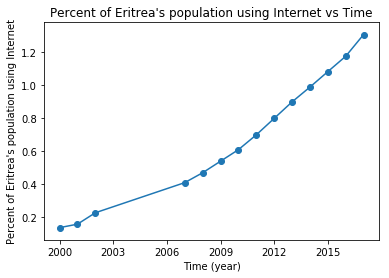

In [27]:
plot_country_data(df, "Eritrea", False, True, 2000, 2017, [2003, 2004, 2005, 2006], "Percent of Eritrea's population using Internet vs Time", "Time (year)", "Percent of Eritrea's population using Internet", "INTEritrea.png")


0


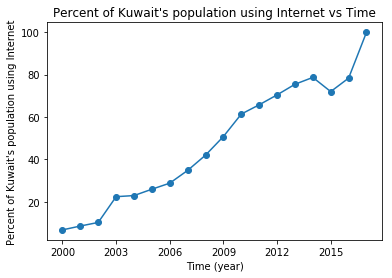

In [28]:
plot_country_data(df, "Kuwait", False, True, 2000, 2017, [], "Percent of Kuwait's population using Internet vs Time", "Time (year)", "Percent of Kuwait's population using Internet", "INTKuwait.png")


0


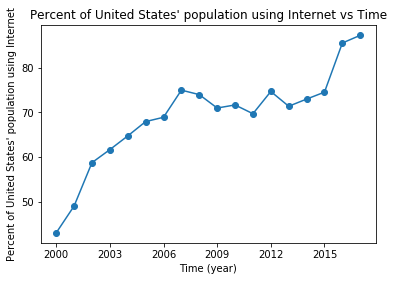

In [29]:
plot_country_data(df, "United States", False, True, 2000, 2017, [], "Percent of United States' population using Internet vs Time", "Time (year)", "Percent of United States' population using Internet", "INTUS.png")


In [35]:
find_fastest_growing_region(df, "2016", "2017")

Inclines: Aruba
Inclines: Afghanistan
Inclines: Angola
Inclines: Albania
Inclines: Arab World
Inclines: United Arab Emirates
Inclines: Argentina
Inclines: Armenia
Inclines: Antigua and Barbuda
Inclines: Australia
Inclines: Austria
Inclines: Azerbaijan
Inclines: Belgium
Inclines: Benin
Inclines: Burkina Faso
Inclines: Bulgaria
Inclines: Bahamas, The
Inclines: Bosnia and Herzegovina
Inclines: Belarus
Inclines: Belize
Inclines: Bermuda
Inclines: Bolivia
Inclines: Brazil
Inclines: Barbados
Inclines: Brunei Darussalam
Inclines: Bhutan
Inclines: Botswana
Inclines: Central African Republic
Inclines: Central Europe and the Baltics
Inclines: Switzerland
Inclines: China
Inclines: Cote d'Ivoire
Inclines: Congo, Dem. Rep.
Inclines: Congo, Rep.
Inclines: Colombia
Inclines: Comoros
Inclines: Cabo Verde
Inclines: Costa Rica
Inclines: Caribbean small states
Inclines: Cuba
Inclines: Curacao
Inclines: Cayman Islands
Inclines: Cyprus
Inclines: Czech Republic
Inclines: Germany
Inclines: Djibouti
Inclines:

(42.546494142565265, 'Djibouti')

In [42]:
find_fastest_declining_region(df, "2016", "2017")

Declines: Andorra
Declines: Burundi
Declines: Bangladesh
Declines: Bahrain
Declines: Canada
Declines: Chile
Declines: Cameroon
Declines: Finland
Declines: United Kingdom
Declines: Croatia
Declines: Hungary
Declines: Ireland
Declines: Japan
Declines: Luxembourg
Declines: Mozambique
Declines: Norway
Declines: Singapore
Declines: Sierra Leone


(-7.521239086836259, 'Mozambique')

0


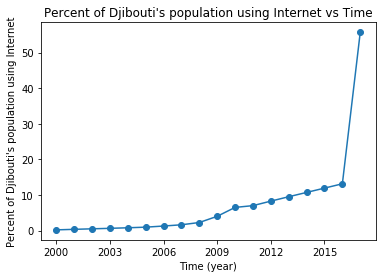

In [37]:
plot_country_data(df, "Djibouti", False, True, 2000, 2017, [], "Percent of Djibouti's population using Internet vs Time", "Time (year)", "Percent of Djibouti's population using Internet", "INTDjibouti.png")


0


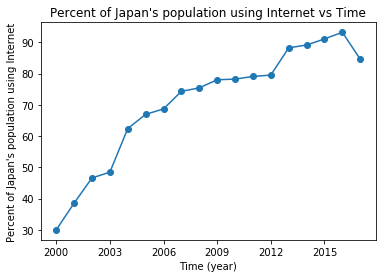

In [41]:
plot_country_data(df, "Japan", False, True, 2000, 2017, [], "Percent of Japan's population using Internet vs Time", "Time (year)", "Percent of Japan's population using Internet", "INTJapan.png")


0


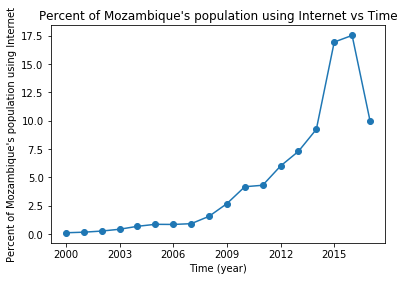

In [43]:
plot_country_data(df, "Mozambique", False, True, 2000, 2017, [], "Percent of Mozambique's population using Internet vs Time", "Time (year)", "Percent of Mozambique's population using Internet", "INTMozambique.png")
